# IBM Assignment 3

## Problem Statement: Abalone Age Prediction

### Description:- 
Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

### Attribute Information:
Given is the attribute name, attribute type, measurement unit, and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.
### Name / Data Type / Measurement Unit / Description

1- Sex / nominal / -- / M, F, and I (infant)

2- Length / continuous / mm / Longest shell measurement

3- Diameter / continuous / mm / perpendicular to length

4- Height / continuous / mm / with meat in shell

5- Whole weight / continuous / grams / whole abalone

6- Shucked weight / continuous / grams / weight of meat

7- Viscera weight / continuous / grams / gut weight (after bleeding)

8- Shell weight / continuous / grams / after being dried

9- Rings / integer / -- / +1.5 gives the age in years

### Building a Regression Model
1. Download the dataset: Dataset
2. Load the dataset into the tool.
3. Perform Below Visualizations.
● Univariate Analysis
● Bi-Variate Analysis
● Multi-Variate Analysis
4. Perform descriptive statistics on the dataset.
5. Check for Missing values and deal with them.
6. Find the outliers and replace them outliers
7. Check for Categorical columns and perform encoding. 
8. Split the datainto dependent and independent variables. 
9. Scale the independent variables
10. Split the data into training and testing
11. Build the Model
12. Train the Model
13. Test the Model
14. Measure the performance using Metrics

## Solution

### 1. Download the dataset: Dataset

### The dataset has been downloaded.

### 2. Load the dataset

In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor

In [2]:
# Loading the dataset
df=pd.read_csv('abalone.csv')

In [3]:
# Checking dataset
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
# Checking the shape of dataset
df.shape 

(4177, 9)

In [5]:
# Getting a sample from df
df.sample(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2782,M,0.600,0.480,0.090,1.0500,0.4570,0.2685,0.2800,8
2619,M,0.690,0.540,0.185,1.7100,0.7725,0.3855,0.4325,8
742,F,0.535,0.420,0.150,0.7365,0.2785,0.1860,0.2150,14
480,F,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.4750,29
4155,I,0.440,0.350,0.110,0.3805,0.1575,0.0895,0.1150,6
846,F,0.540,0.420,0.140,0.8050,0.3690,0.1725,0.2100,11
635,M,0.355,0.265,0.090,0.1680,0.0500,0.0410,0.0630,8
1157,F,0.605,0.470,0.165,1.1775,0.6110,0.2275,0.2920,9
1777,I,0.485,0.345,0.160,0.8690,0.3085,0.1850,0.3190,9
2004,I,0.375,0.275,0.085,0.2200,0.1090,0.0500,0.0605,7


### The dataset has been loaded.

### 3. Perform Below Visualizations. 

In [6]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

#### ● Univariate Analysis

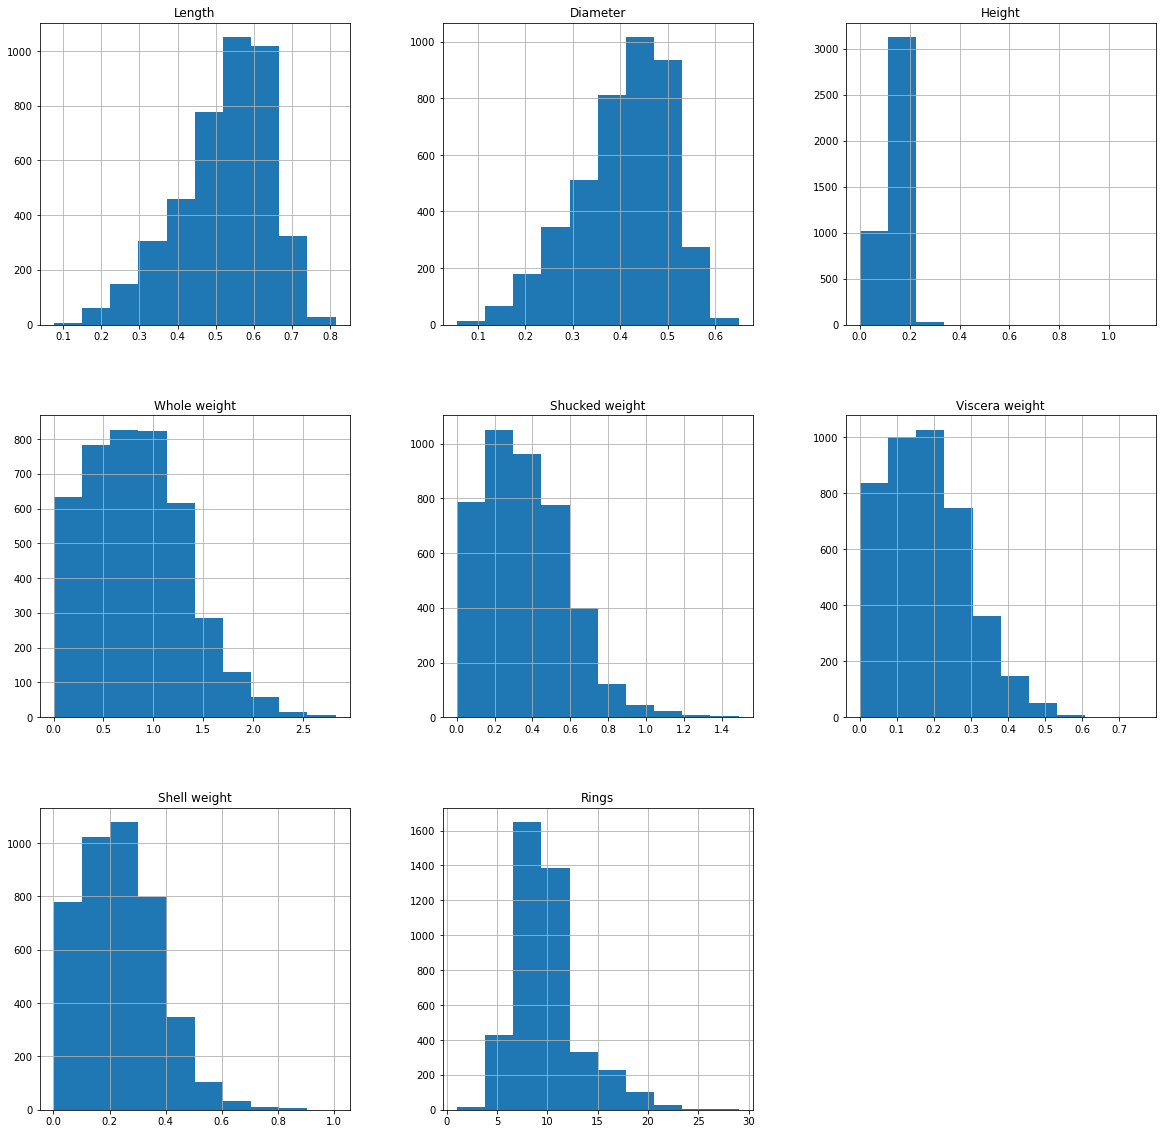

In [7]:
# Visualization of features to check the spread of data:
fig = df.hist(figsize = (20,20))

#### ● Bi - Variate Analysis

In [8]:
col=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
     'Viscera weight', 'Shell weight', 'Rings']

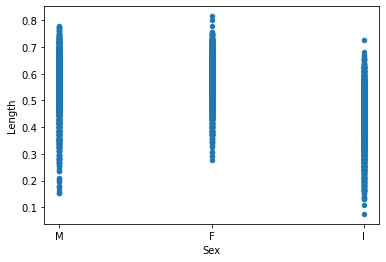

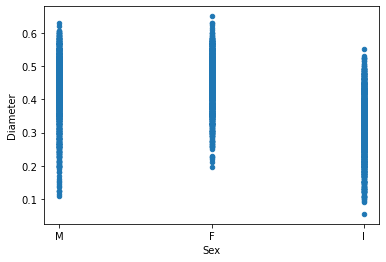

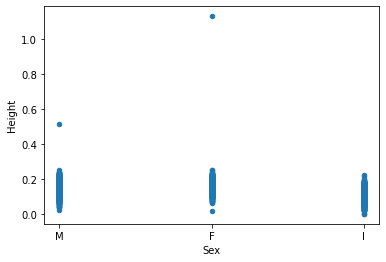

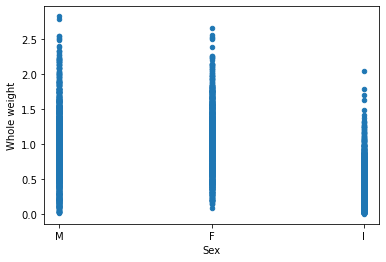

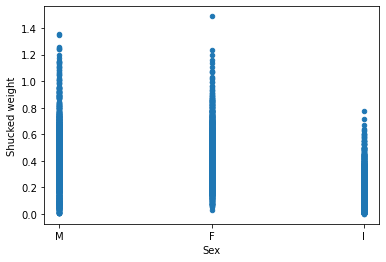

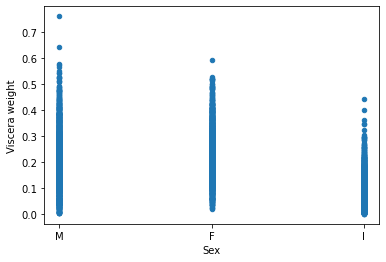

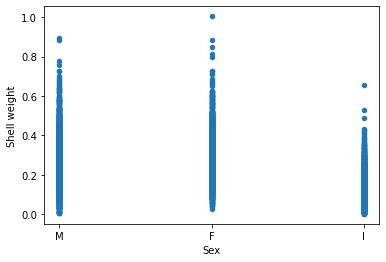

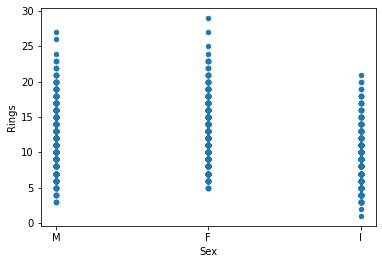

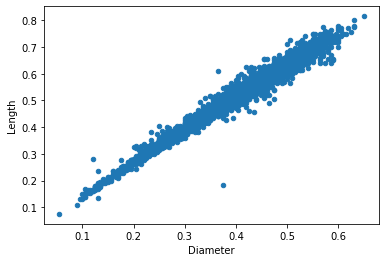

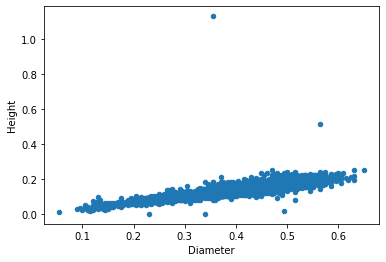

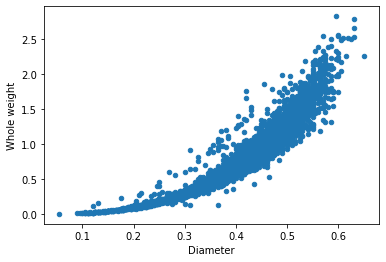

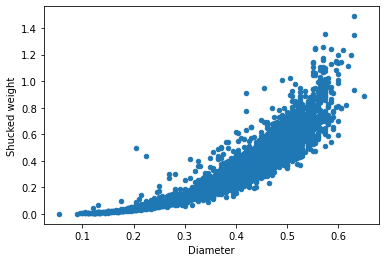

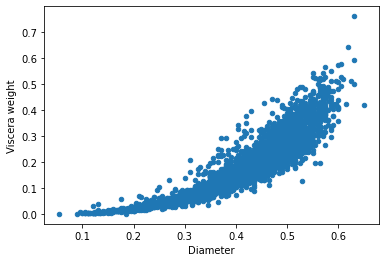

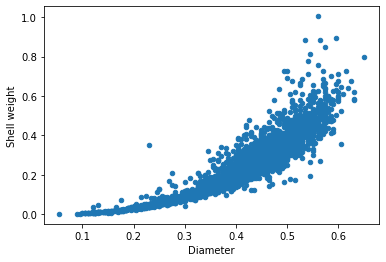

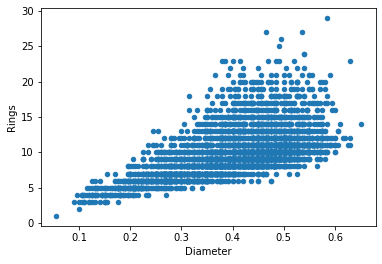

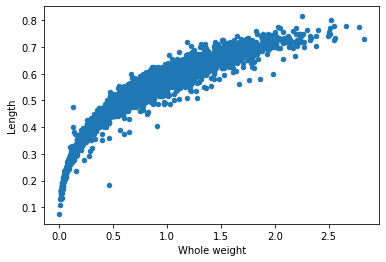

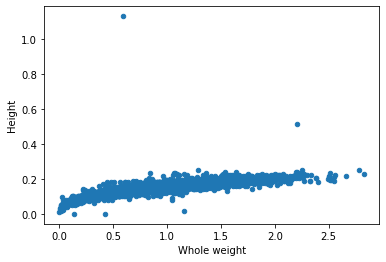

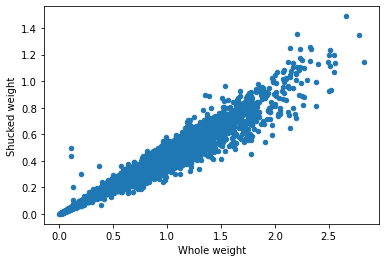

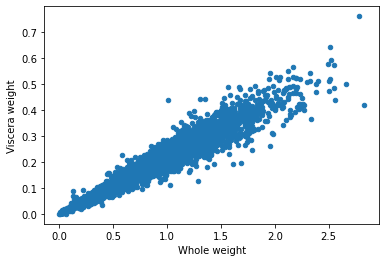

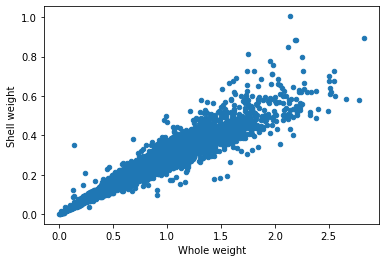

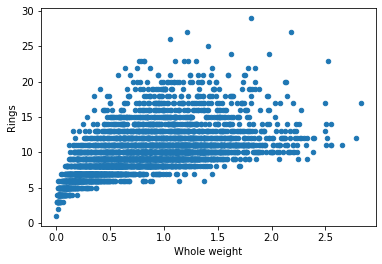

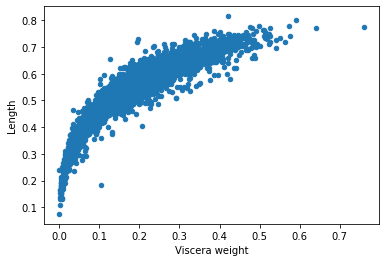

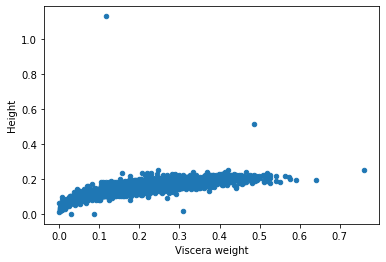

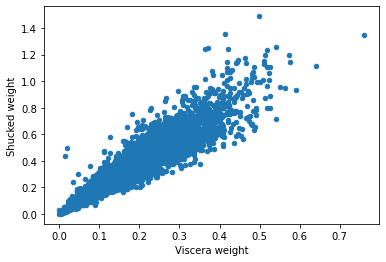

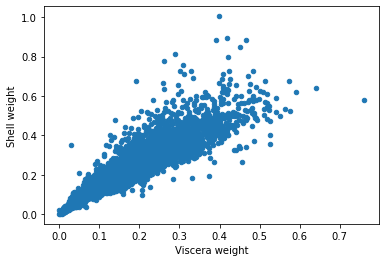

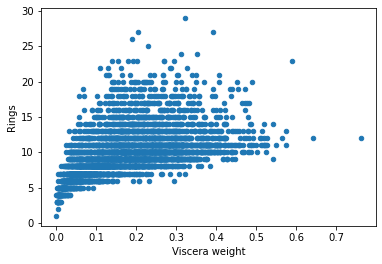

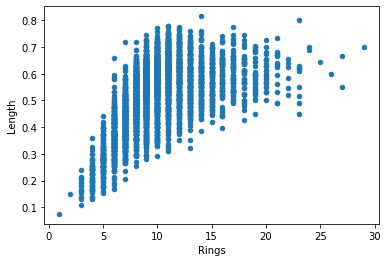

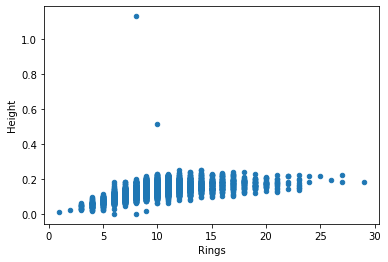

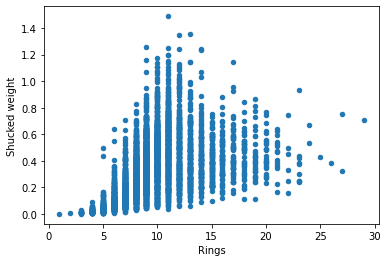

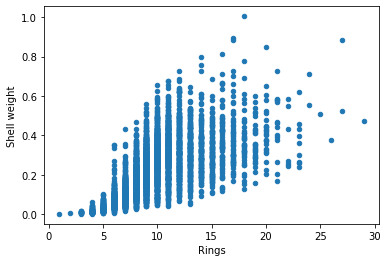

In [9]:
for i in col:
    col.remove(i)
    for k in col:
        df.plot(x=i, y=k, kind='scatter')
        plt.show()

#### ● Multi - Variate Analysis

In [10]:
# Getting the data correlation
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

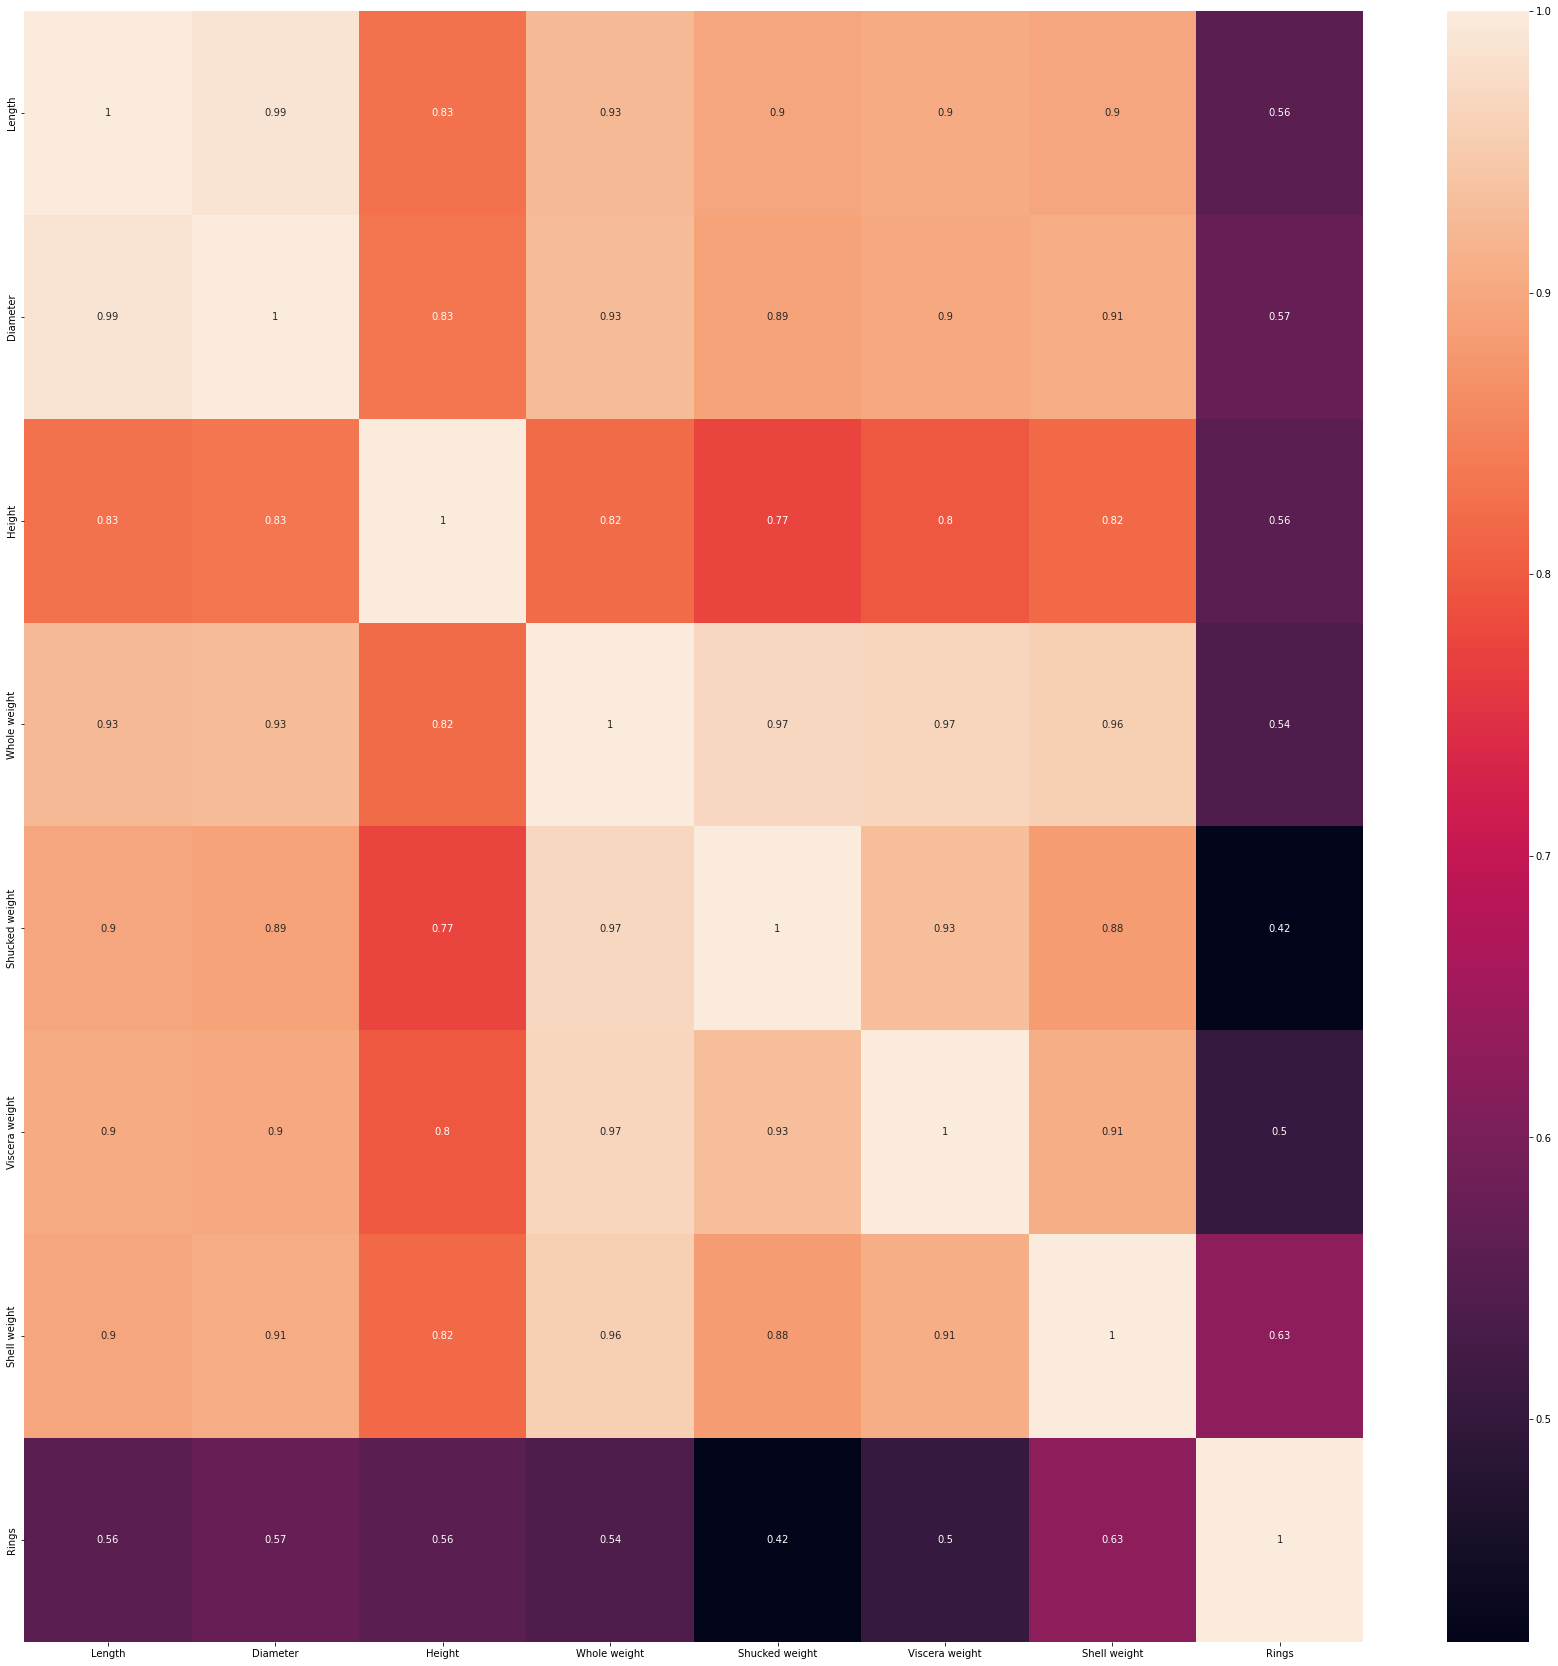

In [11]:
# Visualization of data correlation using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

### The dataset has an unique form of correlation between the attributes.

### All visualizations have been performed.

### 4. Perform descriptive statistics on the dataset.

In [12]:
# Getting detail on the feature of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [13]:
# Descriptive statistical analysis on continous attributes
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [14]:
# Descriptive statistical analysis on continous & catagorical attributes
df.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


### Descriptive statistical analysis on the dataset has been performed.

### 5. Handle the Missing values.

<AxesSubplot:>

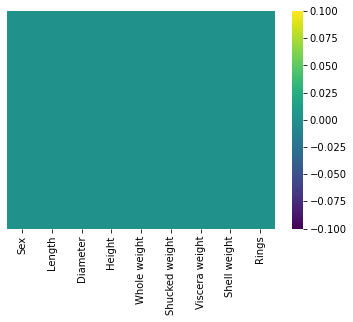

In [15]:
# Checking visually for missing values
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [16]:
# Checking for missing values
for i in df.columns:
    print(i,'=',df[i].isnull().sum(),df[i].dtype)

Sex = 0 object
Length = 0 float64
Diameter = 0 float64
Height = 0 float64
Whole weight = 0 float64
Shucked weight = 0 float64
Viscera weight = 0 float64
Shell weight = 0 float64
Rings = 0 int64


### There are no missing values in the dataframe.

### 6. Find the outliers and replace the outliers

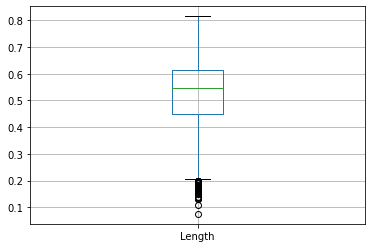

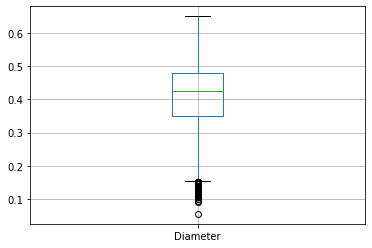

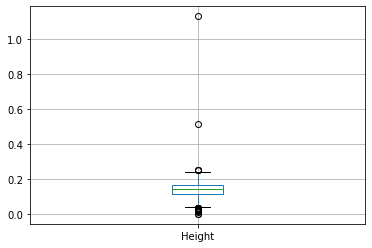

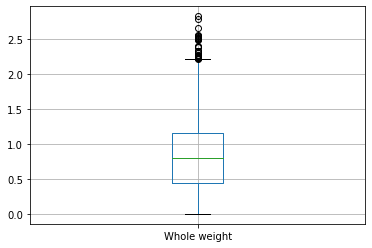

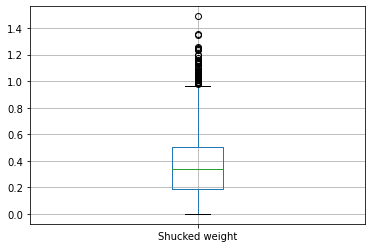

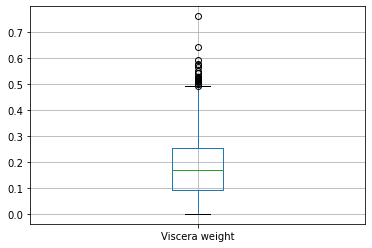

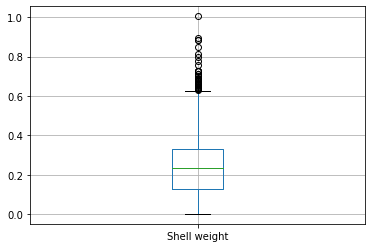

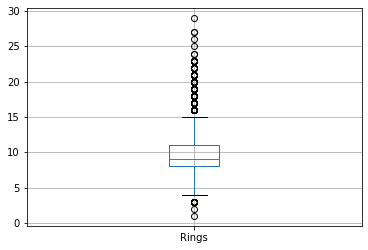

In [17]:
# Checking for Outliers via visualization:
for col in df.columns:
    if df[col].dtype in ["int64","float64"]:
        plt.figure()
        df.boxplot([col])
        plt.show()

In [18]:
# Dealing with Outliers:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

df=cap_data(df)

capping the  Sex
capping the  Length
capping the  Diameter
capping the  Height
capping the  Whole weight
capping the  Shucked weight
capping the  Viscera weight
capping the  Shell weight
capping the  Rings


C:\Users\roshs\AppData\Local\Temp/ipykernel_8852/1692076479.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\roshs\AppData\Local\Temp/ipykernel_8852/1692076479.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]


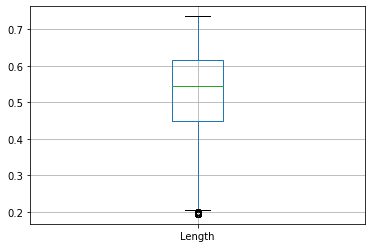

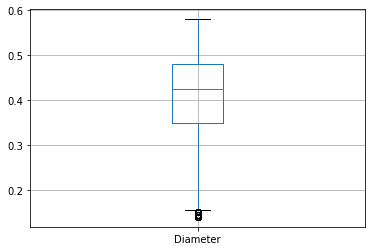

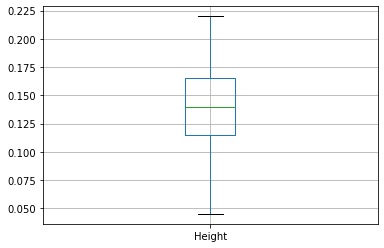

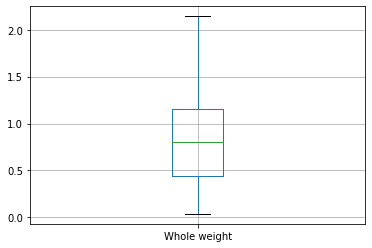

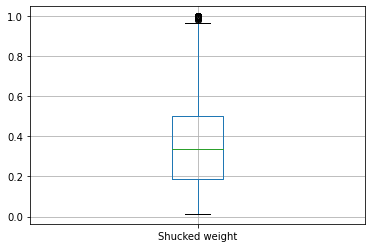

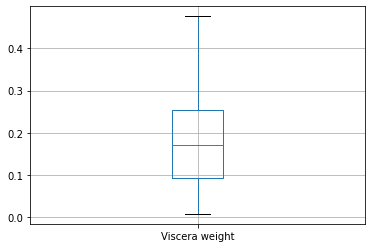

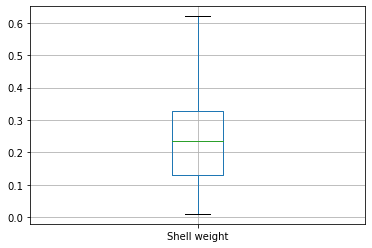

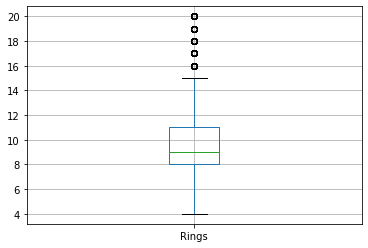

In [19]:
# Rechecking for Outliers via visualization:
for col in df.columns:
    if df[col].dtype in ["int64","float64"]:
        plt.figure()
        df.boxplot([col])
        plt.show()

### All the outliers have been checked and treated.

### 7. Check for Categorical columns and perform encoding.

In [20]:
# Checking for unique values in catagorical feature/column
catlist=[]
for col in df.columns:
    if df[col].dtype=='object':
        catlist.append(col)
        print(col,'=',df[col].nunique())

Sex = 3


In [21]:
# Checking for unique values other interesting columns
for col in catlist:
    x=df[col].nunique()
    print("Count of Unique Values in", col, " :",x)

Count of Unique Values in Sex  : 3


In [22]:
# Label Encoding on Catagorical columns:
df_encoded=df.copy()
lben=LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype=='object':
        df_encoded[col]=df_encoded[col].astype('category')
        df_encoded[col]=lben.fit_transform(df_encoded[col])
df_encoded.head()
# Encoding done.

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [23]:
# Getting information on the dataset
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 277.5 KB


### All catagorical attributes/columns are treated and encoded to be numerical.

### 8. Split the data into dependent and independent variables.

In [24]:
# Seperating Independent and Dependent Variables
x=df_encoded.drop(labels=['Rings'],axis=1)
y=df_encoded[['Rings']]

### The data has been seperated into dependent and independent variables.

### 9. Scale the independent variables

In [25]:
# With Standard Scaling
ss = StandardScaler()
X_ss=ss.fit_transform(x)

In [26]:
# With Min Max Scaling
mms = MinMaxScaler()
X_mms=mms.fit_transform(x)

In [27]:
# With Robust Scaling
rs = RobustScaler()
X_rs=rs.fit_transform(x)

### The independent variables have been scaled

### 10. Split the data into training and testing

In [28]:
# Without Scaling
# Seperating Training and Testing Data for Model Building
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.15)

In [29]:
# With Standard Scaling
xss_train,xss_test,yss_train,yss_test=train_test_split(X_ss, y, test_size=0.15)

In [30]:
# With Min Max Scaling
xmms_train,xmms_test,ymms_train,ymms_test=train_test_split(X_mms, y, test_size=0.15)

In [31]:
# With Robust Scaling
xrs_train,xrs_test,yrs_train,yrs_test=train_test_split(X_rs, y, test_size=0.15)

### The data has been splitted into training and testing data based on the type of scaling done for producing effective results

### 11. Build the Model

In [32]:
# Linear Regression Model Build
lr=LinearRegression()
# Ridge Regression Model Build
rr=Ridge()
# Lasso Regression Model Build
lc=LassoCV()
# Decision Tree Regression Model Build
dt=DecisionTreeRegressor()
# Random Forest Regression Model Build
rf=RandomForestRegressor()
# K - Nearest Neighbors Regression Model Build
kn=KNeighborsRegressor()
# Support Vector Machines Regression Model Build
sv=SVR()
# Gaussian Process Regression Model Build
gr=GaussianProcessRegressor()

### All Regression models were build for modelling

### 12. Train the Model
### 13. Test the Model
### 14. Measure the performance using Metrics

In [33]:
model_list=[lr,rr,lc,dt,rf,kn,sv,gr]

In [34]:
def get_score(model_list):
    for i in model_list:
        print(i)
        i.fit(x_train,y_train)
        tr=i.score(x_train,y_train)
        print('Train Score:',tr)
        te=i.score(x_test,y_test)
        print('Test Score: ',te)
        
        print('With Min Max Scaling')
        i.fit(xmms_train,ymms_train)
        trmms=i.score(xmms_train,ymms_train)
        print('Train Score:',trmms)
        temms=i.score(xmms_test,ymms_test)
        print('Test Score: ',temms)
        
        print('With Robust Scaling')
        i.fit(x_train,y_train)
        trrs=i.score(xrs_train,yrs_train)
        print('Train Score:',trrs)
        ters=i.score(xrs_test,yrs_test)
        print('Test Score: ',ters)

In [35]:
get_score(model_list)

LinearRegression()
Train Score: 0.542511337368438
Test Score:  0.544770172134187
With Min Max Scaling
Train Score: 0.5523681045047666
Test Score:  0.48398499977145915
With Robust Scaling
Train Score: -42.1395644557425
Test Score:  -44.54704582183048
Ridge()
Train Score: 0.535561404676017
Test Score:  0.5507355072253393
With Min Max Scaling
Train Score: 0.5482236066970858
Test Score:  0.4840574677004267
With Robust Scaling
Train Score: -22.654104559965155
Test Score:  -24.43571350109268
LassoCV()
Train Score: 0.5420388976713291
Test Score:  0.5467424799209522

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ros


With Min Max Scaling
Train Score: 0.552224558937428
Test Score:  0.48402798176075
With Robust Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(


Train Score: -37.620762029202126
Test Score:  -39.88027570155107
DecisionTreeRegressor()
Train Score: 0.9999165063275482
Test Score:  0.09671061798986391
With Min Max Scaling
Train Score: 0.9998944893613356
Test Score:  0.1287404749157467
With Robust Scaling
Train Score: -1.2582804224731379
Test Score:  -1.0790984490513869
RandomForestRegressor()


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\roshs\AppData\Local\Temp/ipykernel_8852/2012394052.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  i.fit(x_train,y_train)


Train Score: 0.9360690635228359
Test Score:  0.5572845101508963
With Min Max Scaling


C:\Users\roshs\AppData\Local\Temp/ipykernel_8852/2012394052.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  i.fit(xmms_train,ymms_train)


Train Score: 0.9388285686699913
Test Score:  0.49068045813679984
With Robust Scaling


C:\Users\roshs\AppData\Local\Temp/ipykernel_8852/2012394052.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  i.fit(x_train,y_train)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Train Score: -0.7956420648379758
Test Score:  -0.7090713029435416
KNeighborsRegressor()
Train Score: 0.6853289579058925
Test Score:  0.5140847827430379
With Min Max Scaling
Train Score: 0.6782820705167296
Test Score:  0.43687928856131686
With Robust Scaling
Train Score: -0.5699389266592085
Test Score:  -0.6043779890578147
SVR()


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.5007371227224287
Test Score:  0.5201722753717262
With Min Max Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.5638408654922521
Test Score:  0.5180335418772326
With Robust Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


Train Score: -0.3823985801531946


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


Test Score:  -0.4064425698390466
GaussianProcessRegressor()
Train Score: 0.7832823363525999
Test Score:  -7.360658642443962
With Min Max Scaling
Train Score: 0.8500613494947955
Test Score:  -70.67852823770487
With Robust Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


Train Score: -19473626.481207106
Test Score:  -19016497.962987985


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


### The Models were Trained, Tested & their performance was tested using Metrices

## Among the above used models, Lasso Regression is comparatively best model which has relatively similar testing & testing scores.

# The Assignment 3 has been completed sucessfully.